In [ ]:
# /copy.png

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = '/copy.png'

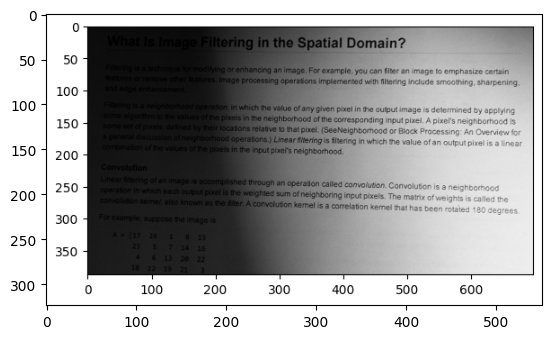

In [ ]:
image = cv2.imread(image_path)
plt.imshow(image)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
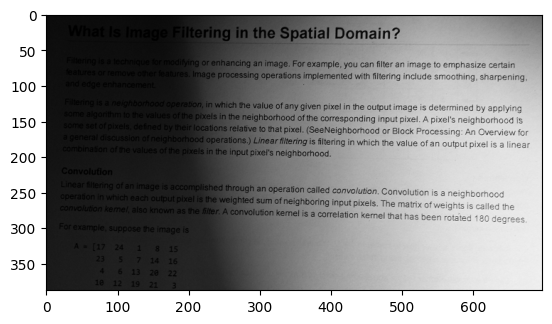

In [ ]:
# 이진화 : 흑백(0, 255) 채널로 이미지 변경
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray

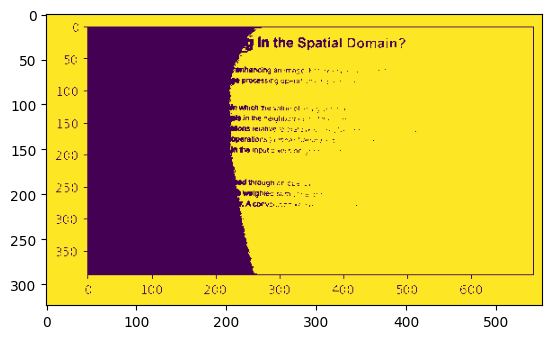

In [ ]:
# 임계값 (threshold)
result, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
plt.imshow(binary)
# 50 : 임계값 (50보다 어두우면 검정, 밝으면 흰색)

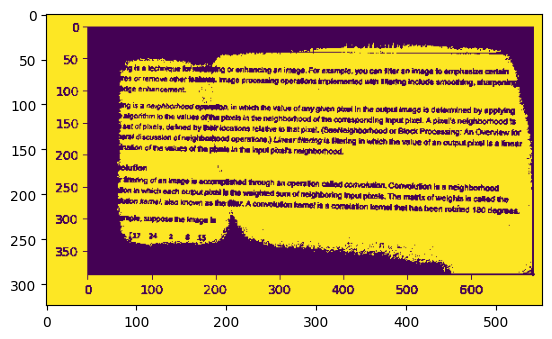

In [ ]:
# 적응형 이진화
# >> 영역(region)마다 다른 임계값 사용하겠다는 의미 (cf. 일반적으로 이진화라 같은 기준)
binary_ad = cv2.adaptiveThreshold(
    gray,                           # 적용할 이미지 (그레이스케일)
    255,                            # 최대값
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # 옵션(적응형의 판단기준) 주변 픽셀의 가중평균(가우시안)
    cv2.THRESH_BINARY,              # 조건(threshold 임계치)에 맞으면 결과를 이렇게 해줘(흰색, 검정색)
    121,                            # 121: 커널 크기 (블록크기, 주변 영역 크기)
    4                               # 상수 (평균/가중평균에서 빼는 값)
)
# 단계
# (121*121) 커널 가져와요. 주변 픽셀 값 가져와요.
# (옵션) cv2.ADAPTIVE_THRESH_GAUSSIAN_C 활용, 주변 픽셀에 가우시안 평균(가중 평균) 적용, 평균 계산
# 여기서 나온 평균값에서 상수 (4)를 뺀 값을 threshold T 로 사용
# 픽셀 값이 T 보다 크면 >> 흰색(255), 작으면 >> 검정색(0)
# C 상수 : 값이 크면 >> threshold 낮아짐 >> 더 밝게 잡힘
# 어디에 사용하나요? 로봇 라인트레이싱, OCR, 자동차번호판 인식 (조명변화에 강해요)

plt.imshow(binary_ad)

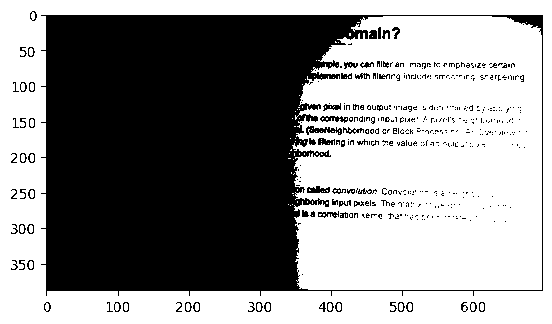

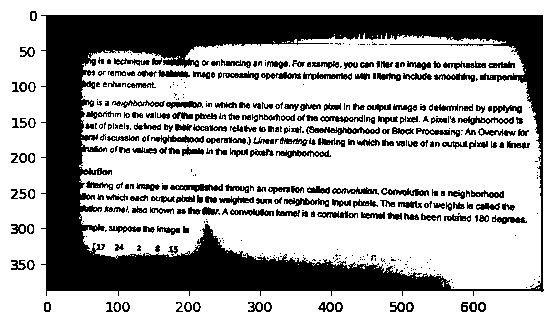

In [ ]:
from google.colab.patches import cv2_imshow

ret, binary_global = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary_ad = cv2.adaptiveThreshold(gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 121, 4)
cv2_imshow(binary_global)  # 검은 부분 생기거나 깨짐
cv2_imshow(binary_ad)      # 글자/라인 선명하게 추출

# binary_ad
# 어디까지 전처리한거야?
# 1) 이미지 불러와서 이진화(흑백 변환)
# 2) 적응형 임계값(threshold) 처리



엣지 검출

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
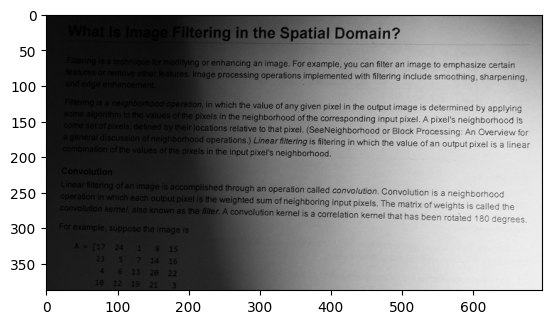

In [ ]:
# 소벨 필터(sobel filter)
# 1차 미분, slope (gradient) (keyword 기억)
# 영상의 밝기 변화량(gradient) 계산 >> 물체 윤곽선(contour), 경계(edge) 추출하는 필터
# 밝기가 급격하게 변하네 >> edge(경계)네 (vs) 변화 없네 >> 배경이네
# >> 경계의 방향과 강도 계산

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
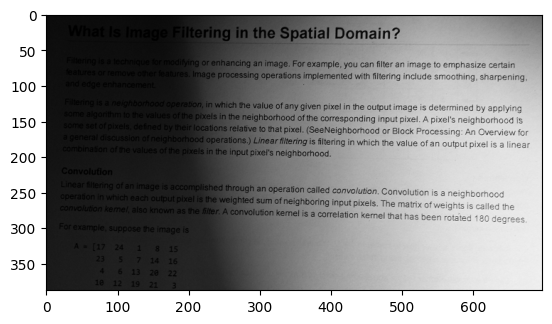

In [ ]:
gray

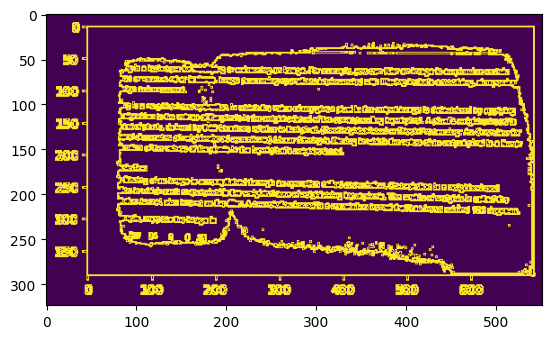

In [ ]:
# 소벨 필터 적용
# 1, 0 >> 수평 엣지, / 0, 1 >> 수직 엣지
# ksize 커널 사이즈

gx = cv2.Sobel(binary_ad, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(binary_ad, cv2.CV_32F, 0, 1, ksize=3)

# binary_ad : 적응형 이진화를 거친 이미지(정제된 데이터)를 가지고 와서
# gx : x방향 (가로) 변화 감지 >> 세로선 찾기
#     >> dx = 1 : x축 방향으로 미분 / dy = 0 : y축 방향으로 미분 안 함
# gy : y방향 (세로) 변화 감지 >> 가로선 찾기
#     >> dy = 1 : y축 방향으로 미분
# cv2.CV_32F : 32비트 실수형(실수라는 음수도 포함하잖아 >> 정밀하게 계산할거야)
# cf.uint8 (일반이미지) openCV나 matplotlib 일반 이미지로 인식(0-255)
# ksize = 3 (3*3) 필터 쓸
# plt.imshow(gx)

# 필터를 사용하여 엣지의 강도 추출

mag = cv2.magnitude(gx, gy)
# 피타고라스 정리 활용 >> 전체 엣지 강도 계산 mag = sqrt(gx^2 + gy^2)
# l2 norm
# gx(x방향 기울기, 밝기 변화량), gy(y방향 기울기, 밝기 변화량)
# >> 경계의 방향을 상관없어요. 얼마나 강한 경계(edge) 있는지 계산함
# print(mag) #계산한 변화량 출력해 본 거예요
# mag 부분을 '이미지'로 표현하도록 0-255 사이로 표현하도록 강제
mag = np.uint8(np.clip(mag, 0,255))
# mag(강도)를 0과 255 사이로 강제해서 openCV 이해하도록 unsigned integer 8 bit로 변환
plt.imshow(mag)


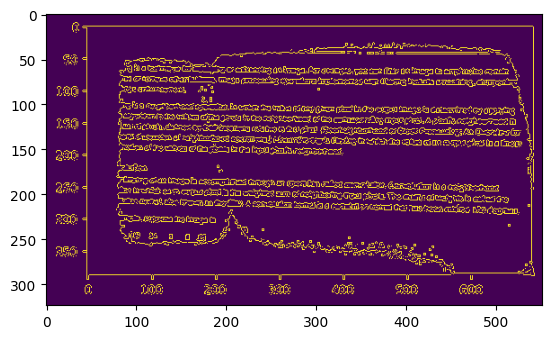

In [ ]:
# Canny 필터 (적용할 이미지, 낮은 임계값, 높은 임계값)
result = cv2.Canny(binary_ad, 30, 200)
# 30: 낮은 임계값 (약한 엣지)
# 200: 높은 임계값 (강한 엣지)
# 30-200 사이에 있는 값 (강한 엣지와 연결되면 살아남아)
plt.imshow(result)

Canny filter 동작방식

1. 노이즈 제거(Gaussian Blur)
2. 그래디언트 계산(Sobel Filter)
3. 비최대 억제(Non-Maximum Suppression) : 엣지의 방향을 따라 로컬의 최댓값만 남기고 나머지는 억제
4. 이중 임계값 처리(Double Thresholding) : 강한 엣지, 약한 엣지를 파악하여 약한 엣지는 강한 엣지와 연결되었을 때만 보존
5. 강한 엣지와 연결되지 않은 약한 엣지는 제거

In [ ]:
# binary_ad
# 어디까지 전처리한거야?
# 1) 이미지 불러와서 이진화(흑백 변환)
# 2) 적응형 임계값(threshold) 처리
# 여기까지 전처리 한 이미지(입력값)로 canny 엣지 검출

In [ ]:
# ksize와 blocksize 차이가 뭐예요?
# ksize : 필터, 마스크의 크기 (홀수만 가능) 3*3, 5*5 등
# blocksize : adaptiveThreshold 같이 적응형 기반 계산 하기 위함 (주변 영역의 이웃의 크기)
# 즉 평균 구할 영역의 크기 (홀수만 가)

코너(모서리) 검출 알고리즘
- 해리스코너(코너) 알고리즘
- 시-토마스 알고리즘

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
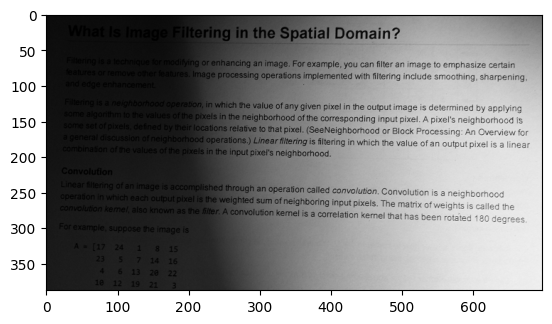

In [ ]:
gray

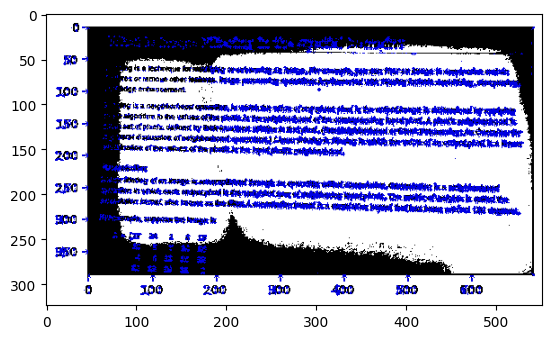

In [ ]:
# 해리스 코너 검출기
# 윈도우를 모든 방향으로 움직였을 때, 픽셀 값의 변화가 가장 큰 지점을 코너라고 생각

harris = cv2.cornerHarris(np.float32(gray),blockSize=2, ksize=3, k=0.04)
# harris
# 모서리(corner) 찾기
# 코너랑 두 방향으로 모두 강한 밝기 변화량이 존재하는 곳(특징점 추출)
# 코너(선과 선이 교차하는 곳) 저기가 코너일 가능성이 얼마나 높지?
# >> 점수(score) 맵(map)
# >> score 가 높을 수록 코너일 가능성이 높음

# np.float32(gray) : gradient 계산(미분) uint8 >> float32
# blocksize=2 (2*2) 영역씩 검사
# >> 코너 점(point) 계산할 때 고려하는 주변 영역 크기
# >> 값이 클수록 넓은 영역 사용 >> 큰 코너에 민감
# ksize 소벨 커널(필터) 사이즈(3*3) : 기울기(gradient) 계산
# k=0.04 민감도(threshold 임계치) 조절 (0.04-0.06)
# 클수록 더 민감하게 반응 >> 코너가 더 많이 검출

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
# 결과를 0-255 범위 정규화(uint8)
# harris : 해리스 코너 검출 결과값 >> 0-255 사이로 정규화
# >> 코너의 강도 값을 사람이 보기 쉽게 이미지 형태로 변환해줘
# 왜 정규화 주나요?
# 해리스 검출 결과가  점수(score) 맵(map) 이기 때문(값 범위가 매우 크거나 음수가 될 수가 있어요)
# >> 0-255로 압축해줘요
# harris_norm = (harris - min(harris)) / (max(harris) - min(harris)) * 255
# astype(np.uint8) openCV 영상 인식 가능하도록 변환

corner = cv2.cvtColor(binary_ad, cv2.COLOR_BGR2RGB)
# print(corner)

corner[harris > 0.9*harris_norm.max()] = (0,0,225)
# 상위 10% 강한 코너만 빨간색(RGB면 파란색) 표시
# harris_norm.max() 255
plt.imshow(corner)

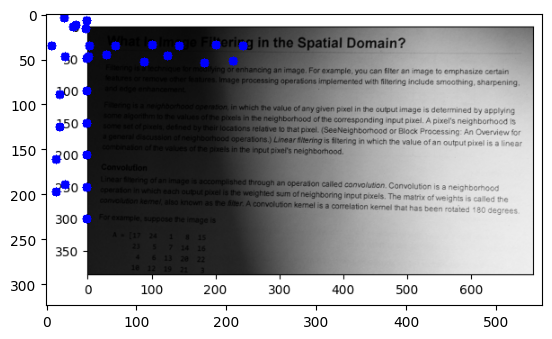

In [ ]:
# 흑백 변환 >> 알고리즘 적용 >> 시각화

src = cv2.imread(image_path)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 알고리즘 적용 : goodFeaturesToTrack

# 추적하기 좋은 특징점 찾기
pts = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=50,     # 최대 50개 특징점
    qualityLevel=0.01, # 상위 1%만
    minDistance=10     # 특징점 간 최소거리 10px
)

# print(pts)

if pts is not None:
  pts = pts.astype(np.uint8)
  for i in pts:
    x, y = i.ravel() # ravel(): 2차원 배열 >> 1차원으로 펼치기
    cv2.circle(image, (x,y), 5, (0,0,255), -1)


plt.imshow(image)


허프변환(Hough Trasnform)
- 직선 검출 가능
- 원 검출 가능

In [ ]:
np.around(1.54).astype(np.int8)

np.int8(2)

In [ ]:
# 이미지 읽어오기

image = cv2.imread('/water_coins.jpg')

array([[234, 239, 242, ..., 249, 250, 250],
       [234, 239, 242, ..., 250, 250, 251],
       [234, 239, 242, ..., 250, 250, 251],
       ...,
       [212, 231, 232, ..., 246, 246, 246],
       [206, 225, 227, ..., 245, 245, 245],
       [200, 219, 222, ..., 244, 244, 244]], dtype=uint8)
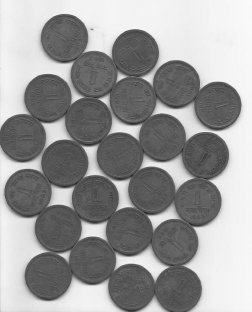

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray

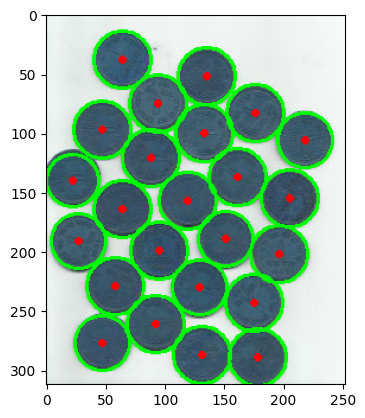

In [ ]:
# 원(동전) 검출
circles = cv2.HoughCircles( gray,                # 이진화된 이미지
                            cv2.HOUGH_GRADIENT,  # 기울기 사용 원을 찾겠다
                            dp=1.2,              # 해상도 scaling 비율
                                                 # 1.0 입력이미지와 같은 해상도
                                                 # (값이 크면 >> 속도 빨라짐, 정확도(성능)이 떨어짐))
                            minDist=30,          # 검출된 원(중심) 사이 최소거리
                                                 # >> 원 중심간 간격이 30 이하 >> 중복 아니다

                            param1 = 100,        # 높은 임계값(canny edge upper threshold)
                            param2 = 30,         # 투표(voting) 누적 임계값(원이라고 판단할 기준)
                            minRadius = 10,      # 최소 반지름
                            maxRadius = 50       # 최대 반지름
                            )

#  투표(voting) : 많은 점(pts)이 원을 지지하면 원으로 인정

if circles is not None:
   circles = np.around(circles).astype(np.uint16)

   for (x, y, r) in circles[0, :]:
    # 원 그림에서 배열의 첫번째 차원(1) 무시
    # circles.shape 3차원 배열 (1,N,3) >> 무시하면 2차원 [N,3]
    # 여기서 첫번째 차원(1) 항상 크기가 1(배치가 1인것과 유사)
    # 세번째 차원(3) : 3가지 정보(0: 원의 중심 x좌표, 1: 원의 중심 y좌표, 2: 원의 반지름)
    # 검출된 모든 원 (n개) 정보만 선택
      cv2.circle(image, (x,y), r, (0,255,0), 2)
      cv2.circle(image, (x,y), 2, (255,0,0), 2)


plt.imshow(image)

In [ ]:
# minDist=30,
# 검출된 원(중심) 사이 최소거리
# >> 원 중심간 간격이 30 이하 >> 중복 아니다
# >> 목적: 과잉 검출 방지
# 30 pixel 거리 이내 다른 원의 중심을 허용 하지 않겠다.
# 즉, 하나의 원에 대한 하나의 검출 결과만 보장한다
# 값이 작으면 서로 가까운 원들을 개별적인 원으로 검출 >> 비슷한 원 여러개가 잡힘
# 값이 크면 원이 너무 멀리 떨어진 경우에만 검출


# param2 = 30,         # 투표(voting) 누적 임계값(원의로 판단할 기준)
# 값이 높으면 (누가봐도) 원이야 하는 확실한 원만 검출
# 값이 낮으면 (아닌거 같은데) 약한 원도 검출

array([[234, 239, 242, ..., 249, 250, 250],
       [234, 239, 242, ..., 250, 250, 251],
       [234, 239, 242, ..., 250, 250, 251],
       ...,
       [212, 231, 232, ..., 246, 246, 246],
       [206, 225, 227, ..., 245, 245, 245],
       [200, 219, 222, ..., 244, 244, 244]], dtype=uint8)
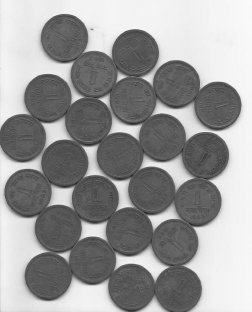

In [ ]:
gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
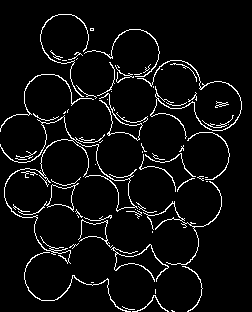

In [ ]:
# 캐니엣지 검출
edges = cv2.Canny(gray, 50, 150)
edges
# 엣지 있으면 255(흰색), 없으면 0(검정색)

ρ = x*cos (θ) + y*sin (θ)

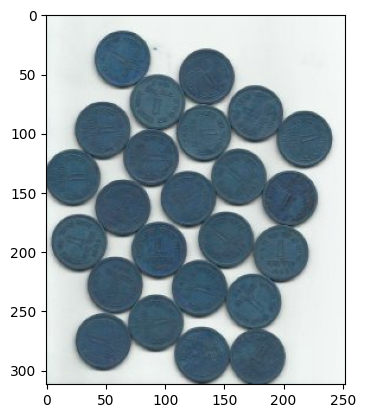

In [ ]:
# 확률적 직선 검출
# 이미지 edge(경계) 에서 직선(line)들을 자동 검출하는 알고리즘
# >> 실제 길이 선분 형태로 반환(실무)
# >> 시작점(x1, y1)과 끝점(x2,y2) 좌표로 이루어진 배열 출력

# cf.  cv2.HoughLines 무한 직선 형태
# HoughLinesP : P (probability) 확률

image = cv2.imread('/water_coins.jpg')

#흑백 변환 -> 엣지 검출 -> 직선 검출
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#캐니 엣지 검출
edges = cv2.Canny(gray, 50, 150)

#확률적 직선 검출
lines = cv2.HoughLinesP(edges,  #엣지의 모음
                rho=1,          #해상도
                theta=np.pi/180,#해상도(각도)
                threshold=100,  #직선으로 간주될 수 있는 최소값
                minLineLength=10, #내가 검출하려는 직선의 최소 길이
                maxLineGap=10) #직선으로 간주되는 간격

#시각화
if lines is not None:
  for line in lines :
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(image)

# rho : 원점(0,0)에서 직선까지 거리 (1px 단위로 매우 정밀하게 계산한다)
# theta : 각도 단위(radian)
# >> np.pi/180 = 1도(degree)
# >> 각도 resolution이 크면,직선 검출 정확도 떨어짐
# threshold=100, # 직선으로 간주될 수 있는 최소값(최소 투표수 100)
# >> 누적 투표수가 100 이상 되어야 선이라고 간주
# >> 높이면 확실한 직선만 검출 (노이즈 적어져요), 낮추면 작은 선들도 다 검출
# minLineLength=10,  # 내가 검출하려는 직선의 최소 길이(길이가 10 px 미만 >> 무시)
# maxLineGap=10)     # 직선으로 간주되는 간격(직선 간격 허용)
# >> 중간에 끊어져 있는 선이 있어요. 선들 간의 사이가 10이하면 연결된 하나의 선으로 간주

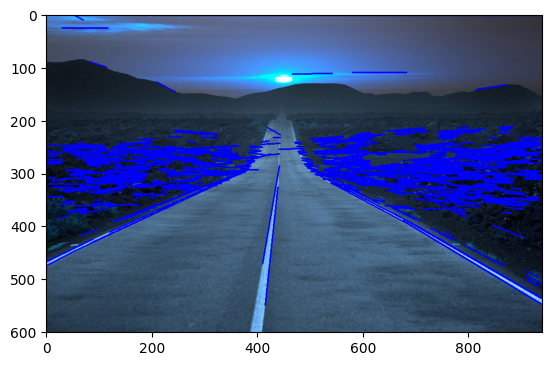

In [ ]:
image = cv2.imread('/lines.png')

#흑백 변환 -> 엣지 검출 -> 직선 검출
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#캐니 엣지 검출
edges = cv2.Canny(gray, 50, 150)

#확률적 직선 검출
lines = cv2.HoughLinesP(edges,  #엣지의 모음
                rho=1,          #해상도
                theta=np.pi/180,#해상도(각도)
                threshold=100,  #직선으로 간주될 수 있는 최소값
                minLineLength=10, #내가 검출하려는 직선의 최소 길이
                maxLineGap=10) #직선으로 간주되는 간격

#시각화
if lines is not None:
  for line in lines :
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(image)

컨투어(contour, 윤곽선) 검출

In [ ]:
# 리스트 컴플리헨션

[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
sample = []

for i in range(10):
  sample.append(i)

print(sample)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = '/water_coins.jpg'

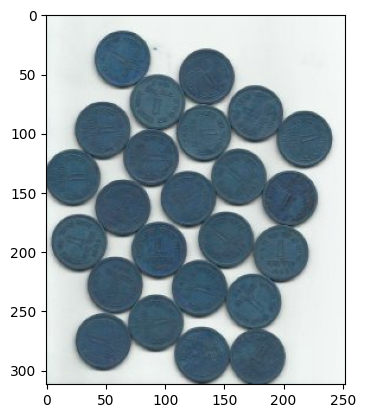

In [ ]:
image = cv2.imread(image_path)
plt.imshow(image)

OTSU : 자동으로 최적 임계값 찾기
- grayscale image >> 이진화 하는 코드
- 히스토그램(픽셀 값 분포) 자동으로 분석 >> 최적의 임계값( threshold) >> 이미지 내부에서 흑(0), 백(255) 나눠줘요
- 문서 스캔, OCR  

In [ ]:
#흑백 -> 임계값으로 컨투어(윤곽선) 검출
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#임계값 적용
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
# '_' : threshold (안 쓴다) 왜? 의미없어. otsu 가 자동으로 최적값 찾아주니까

In [ ]:
#컨투어 검출
#cv2.RETR_EXTERNAL 윤곽선을 찾는 방법
#cv2.CHAIN_APPROX_SIMPLE 윤곽선을 '저장하는 방법'
cons = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# binary : 임계값 적용해서 나온 이진화된 이미지
# RETR_LIST : 리스트(목록)을 검색해줘 (모든 윤곽선 찾기)
# CHAIN_APPROX_NONE 모든 점 저장
# 흰색(255) 영역의 경계선 찾아요 >> 리스트 형식으로 반환

# print(cons)
con_packs = cons[0] if len(cons) == 2 else cons[1]
# print(con_packs)

# cons 의 길이가 정확히 2 면 cons[0] 리스트 목록
# cons[1] : hierachy 계층구조 정보

- openCV 3.X : (contours, hierachy) (윤곽선 리스트, 계층정보)
- openCV 4.X : (contours)  

In [ ]:
cons[:1][0]

(array([[[153, 299]],
 
        [[152, 300]],
 
        [[151, 301]],
 
        [[150, 302]],
 
        [[149, 303]],
 
        [[149, 304]],
 
        [[148, 305]],
 
        [[147, 306]],
 
        [[146, 307]],
 
        [[145, 308]],
 
        [[144, 308]],
 
        [[143, 309]],
 
        [[142, 310]],
 
        [[141, 310]],
 
        [[140, 311]],
 
        [[139, 311]],
 
        [[138, 311]],
 
        [[139, 311]],
 
        [[140, 311]],
 
        [[141, 311]],
 
        [[142, 311]],
 
        [[143, 311]],
 
        [[144, 311]],
 
        [[145, 311]],
 
        [[146, 311]],
 
        [[147, 311]],
 
        [[148, 311]],
 
        [[149, 311]],
 
        [[150, 311]],
 
        [[151, 311]],
 
        [[152, 311]],
 
        [[153, 311]],
 
        [[154, 311]],
 
        [[155, 311]],
 
        [[156, 311]],
 
        [[157, 311]],
 
        [[158, 311]],
 
        [[159, 311]],
 
        [[160, 311]],
 
        [[161, 311]],
 
        [[162, 311]],
 
        [[163, 3

In [ ]:
cons[1]

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [13, 11, -1, -1],
        [14, 12, -1, -1],
        [15, 13, -1, -1],
        [-1, 14, -1, -1]]], dtype=int32)

cv2.RETR_LIST
- 윤곽선 검색 방식(contour retrieval mode)
  - RETR_LIST : 모든 윤곽선 찾아서 리스트로 반환
  - RETR_EXTERNAL : 가장 바깥 윤곽선만
  - RETR_TREE : 윤곽선 계층구조까지 (부모-자식)
  - RETR_CCOMP : 2단계 계층구조까지

- cv2.CHAIN_APPROX_NONE
  - 윤곽선의 모든 점을 전부 저장
- cv2.CHAIN_APPROX_SIMPLE
  - 꼭 필요한 점(시작점, 끝점)만 저장

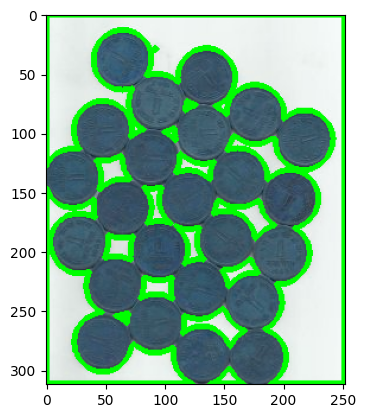

In [ ]:
#시각화
cv2.drawContours(image, con_packs, -1, (0, 255, 0), 3)
# -1: 모든 윤곽선 그려줘
plt.imshow(image)

In [ ]:
# eos